# Resume Screening

### 1. Loading Required Libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

### 2. Loading Dataset

In [6]:
resume = pd.read_csv("UpdatedResumeDataSet.csv", encoding = 'utf8')
resume.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


### 3. Featuring & EDA

In [7]:
# Checking Shape of data
rows = resume.shape[0]
columns = resume.shape[1]
print(f"The Resume Dataset consist {rows} rows & {columns} columns respectively.")

The Resume Dataset consist 962 rows & 2 columns respectively.


In [9]:
# Checking unique features in Category
resume['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Data Science                 40
Mechanical Engineer          40
Sales                        40
Blockchain                   40
ETL Developer                40
Operations Manager           40
Arts                         36
Database                     33
PMO                          30
Health and fitness           30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

 ###### Visualization of Category feature

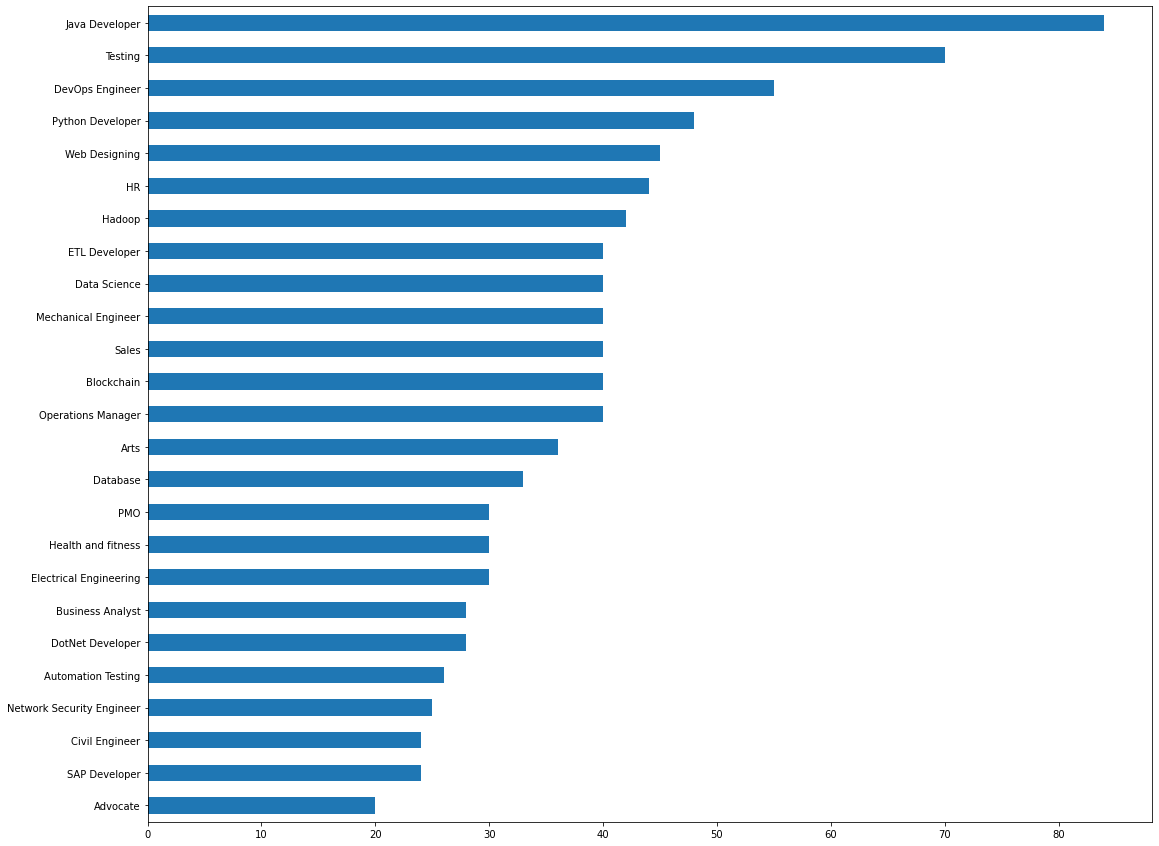

In [23]:
resume["Category"].value_counts().sort_values(ascending=True).plot.barh(figsize = (18, 15))

   + We have 25 job categories in our data set. And as shown in plot above, we have -
       
           - Top 5 are Java Developer, Testing, DevOps Engineer, Python Developer & Web Designing respectively.
           - Bottom 5 are Advocate, Civil Engineer, SAP Developer, Network Security Engineer, Automation Testing 
             respectively.

###### Data Cleaning 

- Remove URLs, Hashtags, Mentions, Special Letters & Punctuations

In [24]:
import re

# a function which removes urls, hashtages, metions, special letters & punctuation
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText) # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText) # remove RT and cc
    resumeText = re.sub('#\S+', ' ', resumeText) # remove hashtages
    resumeText = re.sub('@\S+', ' ', resumeText) # remove mentions
    resumeText = re.sub('[%s]'%re.escape("""!"#$%&'()*+,-./:;<=>?[\]^_`{|}~"""),' ', resumeText) # remove punctuation
    resumeText = re.sub(r'[^\x00-\x7f]', r' ', resumeText)
    resumeText = re.sub('\s+', ' ', resumeText) # remove extra whitespace
    return resumeText

resume['Cleaned_Resume'] = resume['Resume'].apply(lambda x: cleanResume(x))

In [26]:
resume.drop("category", axis = 1, inplace = True)
resume

,Category,Resume,Cleaned_Resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...
...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,Computer Skills Proficient in MS office Word B...
958,Testing,â Willingness to accept the challenges. â ...,Willingness to a ept the challenges Positive ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",PERSONAL SKILLS Quick learner Eagerness to lea...
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


###### Creating Wordcloud

    - Requires Libraries - 
             
             + NLTK
             + NLTK - corpus.stopwords
             + String
             + wordcloud

In [32]:
import string
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

[('Details', 484), ('Exprience', 446), ('months', 376), ('company', 330), ('description', 310), ('1', 290), ('year', 232), ('January', 216), ('Less', 204), ('Data', 200), ('data', 192), ('Skill', 166), ('Maharashtra', 166), ('6', 164), ('Python', 156), ('Science', 154), ('I', 146), ('Education', 142), ('College', 140), ('The', 126), ('project', 126), ('like', 126), ('Project', 124), ('Learning', 116), ('India', 114), ('Machine', 112), ('University', 112), ('Web', 106), ('using', 104), ('monthsCompany', 102), ('B', 98), ('C', 98), ('SQL', 96), ('time', 92), ('learning', 90), ('Mumbai', 90), ('Pune', 90), ('Arts', 90), ('A', 84), ('application', 84), ('Engineering', 78), ('24', 76), ('various', 76), ('Software', 76), ('Responsibilities', 76), ('Nagpur', 76), ('development', 74), ('Management', 74), ('projects', 74), ('Technologies', 72)]


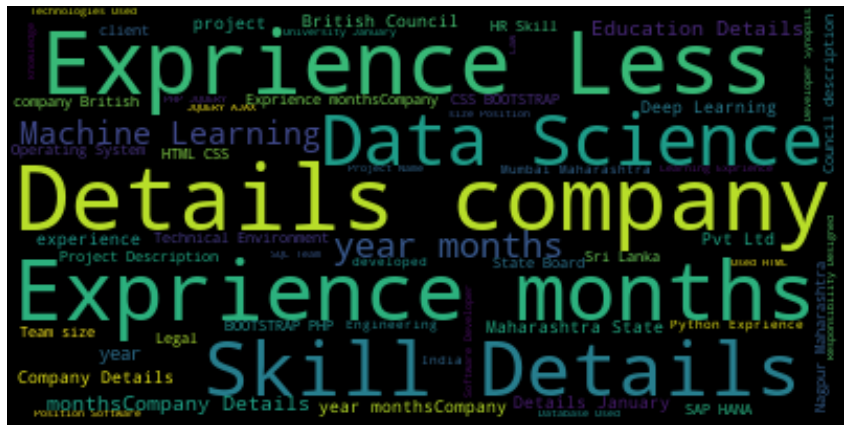

In [38]:
one_set_of_stopwords = set(stopwords.words('english') + ['``', "''"])
total_words = []
Sentences = resume['Resume'].values
clean_sentences = ""

for i in range(0, 160):
    cleanedText = cleanResume(Sentences[i])
    clean_sentences +=cleanedText
    required_words = nltk.word_tokenize(cleanedText)
    for word in required_words:
        if word not in one_set_of_stopwords and word not in string.punctuation:
            total_words.append(word)

word_freq_dist = nltk.FreqDist(total_words)
most_common_words = word_freq_dist.most_common(50)
print(most_common_words)

wc = WordCloud().generate(clean_sentences)
plt.figure(figsize = (15, 15))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [37]:
# import nltk
# nltk.download('stopwords')

# nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sharmila_biyani\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [ ]:
# oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
# totalWords =[]
# Sentences = resume['Resume'].values
# cleanedSentences = ""
# for i in range(0,160):
#     cleanedText = cleanResume(Sentences[i])
#     cleanedSentences += cleanedText
#     requiredWords = nltk.word_tokenize(cleanedText)
#     for word in requiredWords:
#         if word not in oneSetOfStopWords and word not in string.punctuation:
#             totalWords.append(word)
    
# wordfreqdist = nltk.FreqDist(totalWords)
# mostcommon = wordfreqdist.most_common(50)
# print(mostcommon)

# wc = WordCloud().generate(cleanedSentences)
# plt.figure(figsize=(15,15))
# plt.imshow(wc, interpolation='bilinear')
# plt.axis("off")
# plt.show()

### 3. Model Building

In [39]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()

for i in var_mod:
    resume[i] = le.fit_transform(resume[i])

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

# Creating Train & Target sets
required_text = resume['Cleaned_Resume'].values
required_target = resume['Category'].values


# applying TF-IDF Vectorizer
word_vectorizer = TfidfVectorizer(sublinear_tf = True, stop_words = 'english', max_features = 1500)
word_vectorizer.fit(required_text)
word_features = word_vectorizer.transform(required_text)

# Spliting  X & y
X_train, X_test, y_train, y_test = train_test_split(word_features, required_target, test_size = 0.20, random_state = 7)


In [46]:
print(train_tfidf)

  (0, 808)	0.02657619268547651
  (0, 497)	0.044121299231398244
  (0, 1010)	0.038504674109228115
  (0, 98)	0.041334363817232565
  (0, 145)	0.038504674109228115
  (0, 104)	0.038504674109228115
  (0, 1474)	0.031255108961801316
  (0, 346)	0.02717699732303693
  (0, 506)	0.041334363817232565
  (0, 1454)	0.038925585439333235
  (0, 1218)	0.04795245232900063
  (0, 515)	0.04030241370901731
  (0, 218)	0.038712982118395134
  (0, 1438)	0.02632000818406374
  (0, 1334)	0.04485810515994575
  (0, 1488)	0.03564204221423358
  (0, 1407)	0.09413977073502851
  (0, 837)	0.038712982118395134
  (0, 326)	0.04607255376258195
  (0, 469)	0.03340391272810744
  (0, 160)	0.036412022205622
  (0, 1490)	0.04991026618288883
  (0, 578)	0.058828190491478194
  (0, 625)	0.07800761450431214
  (0, 1388)	0.02947780721956072
  :	:
  (768, 278)	0.10024660697924413
  (768, 1437)	0.048847900497621964
  (768, 1055)	0.03476662891118423
  (768, 501)	0.047181992948875116
  (768, 1239)	0.032648144459262174
  (768, 1410)	0.15703096696175

In [53]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)

# predicting models
y_hat = clf.predict(X_train)
score1 = accuracy_score(y_train, y_hat)
print(f">>> Accuracy of k-NN Classifier on Train set : {round(score1 * 100, 2)}.")

y_pred = clf.predict(X_test)
score2 = accuracy_score(y_test, y_pred)
print(f">>> Accuracy of k-NN Classifier on Test set : {round(score2 * 100, 2)}.")


>>> Accuracy of k-NN Classifier on Train set : 98.83.
>>> Accuracy of k-NN Classifier on Test set : 98.45.


In [48]:
print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, y_pred)))


 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         5
           8       1.00      0.90      0.95        10
           9       0.83      1.00      0.91         5
          10       1.00      1.00      1.00         6
          11       1.00      1.00      1.00         7
          12       1.00      0.78      0.88         9
          13       1.00      1.00      1.00        11
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.

In [49]:
print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_train, y_hat)))


 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        29
           2       1.00      0.82      0.90        22
           3       1.00      1.00      1.00        28
           4       0.96      1.00      0.98        23
           5       0.95      1.00      0.98        20
           6       1.00      1.00      1.00        34
           7       1.00      1.00      1.00        28
           8       1.00      0.93      0.97        45
           9       1.00      1.00      1.00        23
          10       1.00      1.00      1.00        34
          11       0.92      1.00      0.96        23
          12       1.00      0.94      0.97        35
          13       1.00      1.00      1.00        31
          14       1.00      1.00      1.00        25
          15       0.97      1.00      0.